Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

/home/jsutker/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg
import math
import thinkstats2
import thinkplot
import numpy as np
df = nsfg.ReadFemPreg()

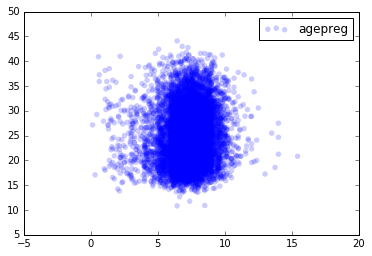

In [3]:
weights, ages = df.totalwgt_lb, df.agepreg
thinkplot.Scatter(weights, ages)
thinkplot.Show()

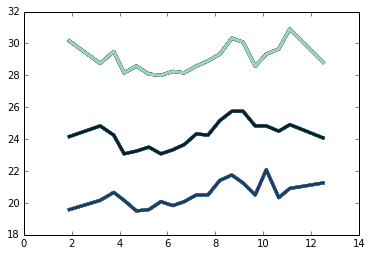

In [4]:
df = df.dropna(subset=['totalwgt_lb', 'agepreg'])
bins = np.arange(3, 12, .5)
indices = np.digitize(df.totalwgt_lb, bins)
groups = df.groupby(indices)
for i, group in groups:
    weights = [group.totalwgt_lb.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    for percent in [75, 50, 25]:
        ages = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(weights, ages, label=label)

In [5]:
#Pearson's
#z = (x-mean)/standard_dev
weights, ages = df.totalwgt_lb, df.agepreg
thinkstats2.Corr(weights, ages), thinkstats2.SpearmanCorr(weights, ages)

(0.068833970354109028, 0.094610041096582262)

There does not seem to be practically any correlation. What little correlation there is is positive, but still.